<a href="https://colab.research.google.com/github/Kira-may/pis/blob/main/pr_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
import ipywidgets as widg

from IPython.display import display
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# import data

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)

names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
data.columns = names

data = data.drop(columns='ID', )

data['Class'].replace(
                      {
                          1:'building_windows_float_processed',
                          2:'building_windows_non_float_processed',
                          3:'vehicle_windows_float_processed',
                          4:'vehicle_windows_non_float_processed',
                          5:'containers',
                          6:'tableware',
                          7:'headlamps'
                      }, inplace = True)



In [3]:
for col in data.columns:
  fr = np.random.randint(5, 10) / 100 
  data.loc[data.sample(frac=fr).index, col] = np.nan

# Data Vizualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      203 non-null    float64
 1   Na      201 non-null    float64
 2   Mg      195 non-null    float64
 3   Al      203 non-null    float64
 4   Si      201 non-null    float64
 5   K       203 non-null    float64
 6   Ca      199 non-null    float64
 7   Ba      201 non-null    float64
 8   Fe      201 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,203.000000,201.000000,195.000000,203.000000,201.000000,203.000000,199.000000,201.000000,201.000000
mean,1.518352,13.375920,2.676410,1.428768,72.629801,0.495419,8.959899,0.177861,0.055473
std,0.003081,0.782587,1.455861,0.483260,0.763734,0.668501,1.447979,0.501864,0.096907
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516485,12.870000,1.985000,1.190000,72.280000,0.120000,8.220000,0.000000,0.000000
50%,1.517660,13.270000,3.480000,1.360000,72.790000,0.550000,8.610000,0.000000,0.000000
75%,1.519155,13.790000,3.600000,1.620000,73.080000,0.610000,9.190000,0.000000,0.090000
max,1.533930,15.790000,4.490000,3.040000,75.410000,6.210000,16.190000,3.150000,0.510000


In [6]:
display(data['Class'].describe())
print('\n==============================================\n')
display(data['Class'].value_counts())

count                                      203
unique                                       6
top       building_windows_non_float_processed
freq                                        72
Name: Class, dtype: object

building_windows_non_float_processed    72
building_windows_float_processed        66
headlamps                               28
vehicle_windows_float_processed         15
containers                              13
tableware                                9
Name: Class, dtype: int64

In [7]:
# for col in data.columns:
#     missing_values_counts = data(col).isna().sum()
#     data(col).isna().sum()
#     percentage = 100 * data(col).isna().sum()/len(data('col'))
#     print("Column",col,"contains",missing_values_counts,"NULL values (",
#           percentage)

# Histograms

In [8]:
col = 'Al'
# plt.hist(col)
# plt.show()

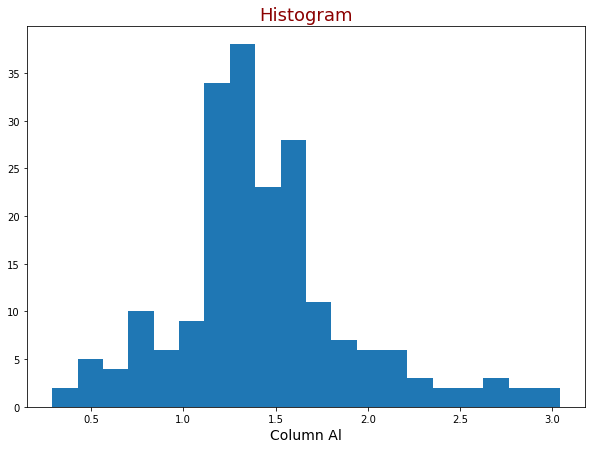

In [9]:
fig, ax = plt.subplots(figsize=(10,7))

ax.hist(data[col], bins = 20)

ax.set_xlabel('Column ' + str(col), fontsize = 14)
ax.set_title('Histogram', fontsize = 18, color = 'darkred')

plt.show()

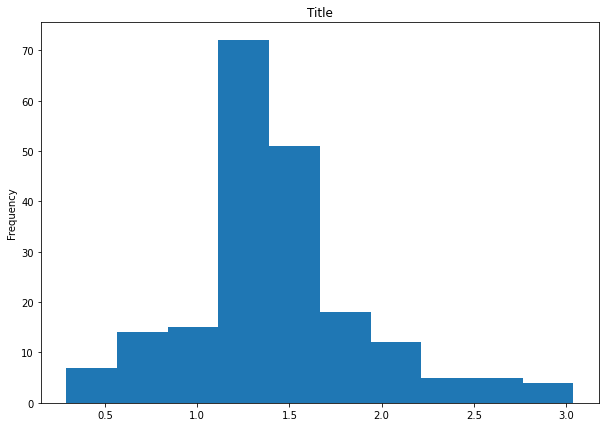

In [10]:
# data.plot(figsize=(15,8))
ax = data[col].plot(kind='hist', figsize=(10,7))
ax.set_title('Title')

plt.show()

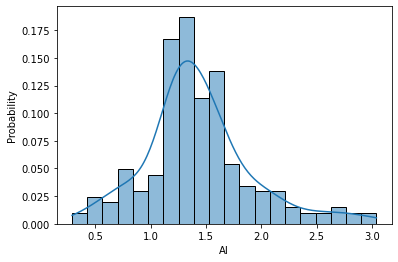

In [11]:
sns.histplot(data=data, x='Al',
             bins=20, 
             kde=True,
             stat='probability')
plt.show()

# Barplot

In [12]:
df1 = data['Class'].value_counts()
df1 

building_windows_non_float_processed    72
building_windows_float_processed        66
headlamps                               28
vehicle_windows_float_processed         15
containers                              13
tableware                                9
Name: Class, dtype: int64

In [13]:
df1.index.values

array(['building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'vehicle_windows_float_processed', 'containers', 'tableware'],
      dtype=object)

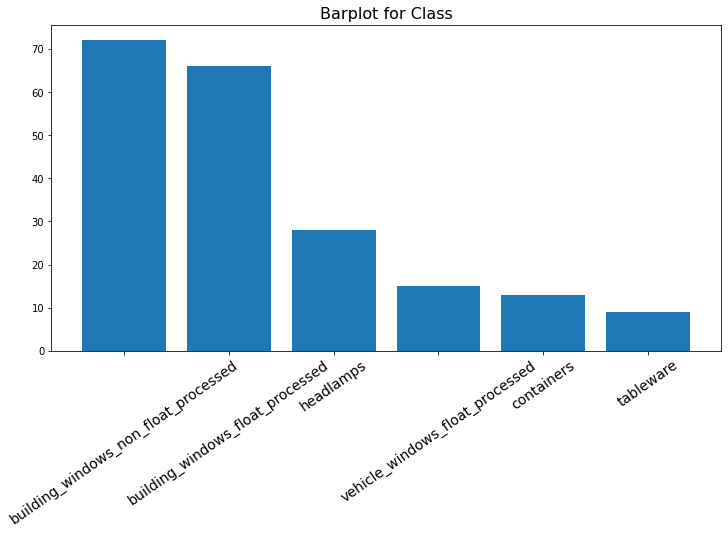

In [14]:
col1 = 'Class'

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(data['Class'].value_counts().index.values,
       data['Class'].value_counts().values)

ax.set_xlabel(None, fontsize = 16 )
ax.set_title('Barplot for '+str(col1), fontsize=16)
ax.tick_params(axis='x', which='major',
               labelsize=14, rotation=35)

plt.show()

# Boxplot

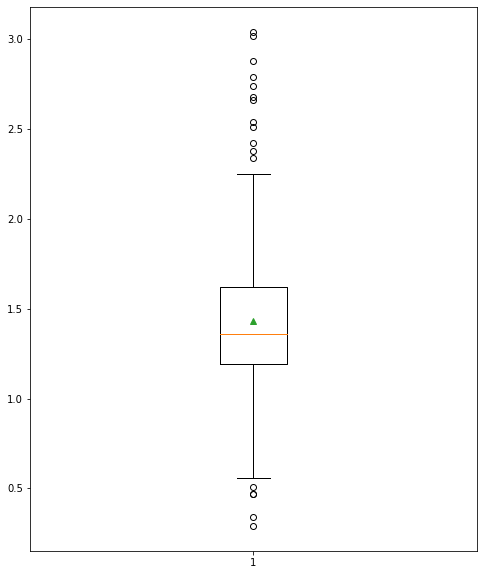

In [15]:
# np.isnan(data['Al'])
# data['Al'][~np.isnan(data['Al'])]

fig3, ax3 = plt.subplots(figsize = (8, 10))

ax3.boxplot(data['Al'][~np.isnan(data['Al'])], showmeans = True, )

plt.show()


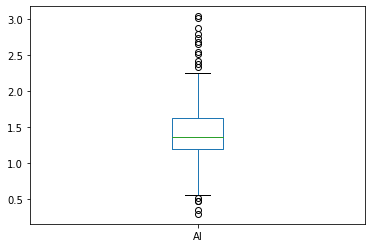

In [16]:
data[col].plot(kind = 'box')
plt.show()

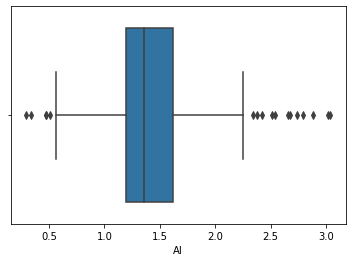

In [17]:
sns.boxplot(data=data, x=col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


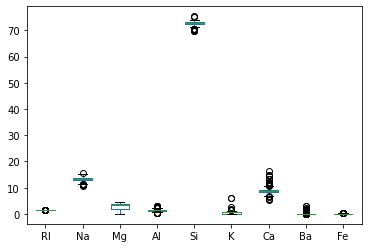

In [18]:
data.plot(kind='box')
plt.show()

# Scaler

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


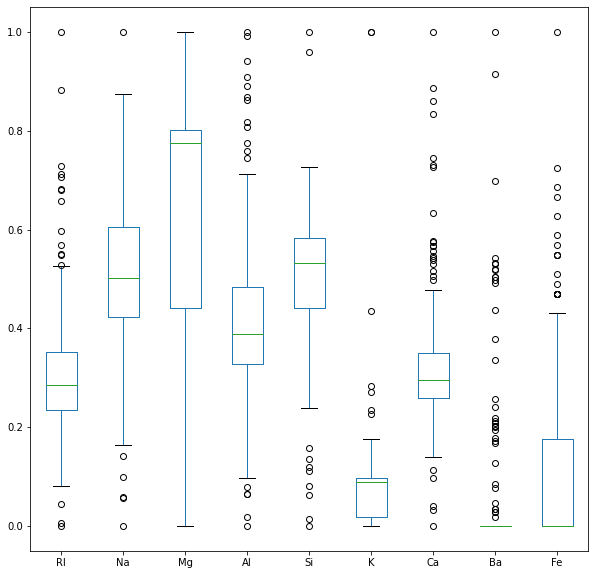

In [19]:
scaler = prepro.MinMaxScaler()
dataScaled = scaler.fit_transform(data[data.columns.values[data.columns.values != 'Class']])

dataScaled = pd.DataFrame(dataScaled, 
                          columns = data.columns.values[data.columns.values != 'Class'])
dataScaled.plot(kind = 'box', figsize = (10, 10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


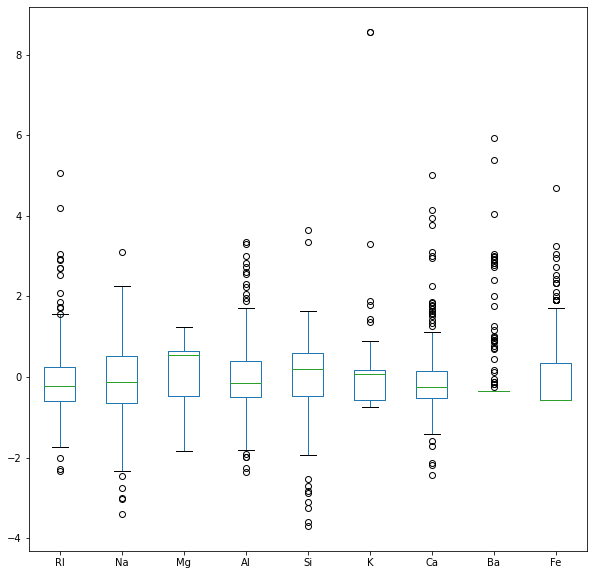

In [20]:
scaler_standart = prepro.StandardScaler()

DataScaled_standart = scaler_standart.fit_transform(data[data.columns.values[data.columns.values != 'Class']])
DataScaled_standart = pd.DataFrame(DataScaled_standart, columns = data.columns.values[data.columns.values != 'Class'])

DataScaled_standart.plot(kind = 'box', figsize = (10, 10))

# Pair plot

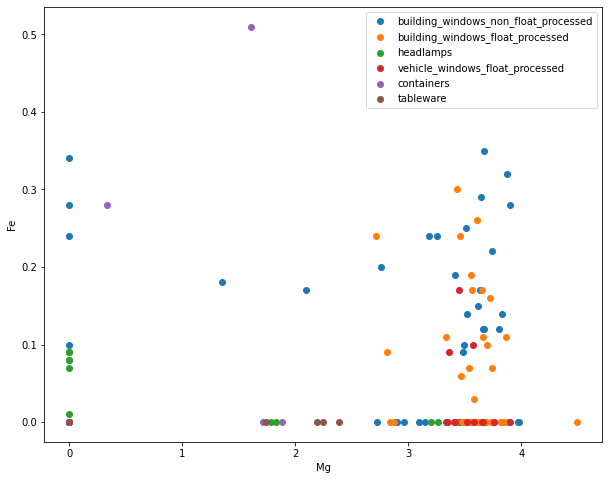

In [21]:
fig, ax = plt.subplots(figsize = (10, 8))

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data['Mg'][data['Class'] == glassType],
             data['Fe'][data['Class'] == glassType],
             label = glassType, )

# ax.scatter(data['Mg'], data['Fe'])
ax.set_xlabel('Mg')
ax.set_ylabel('Fe')
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


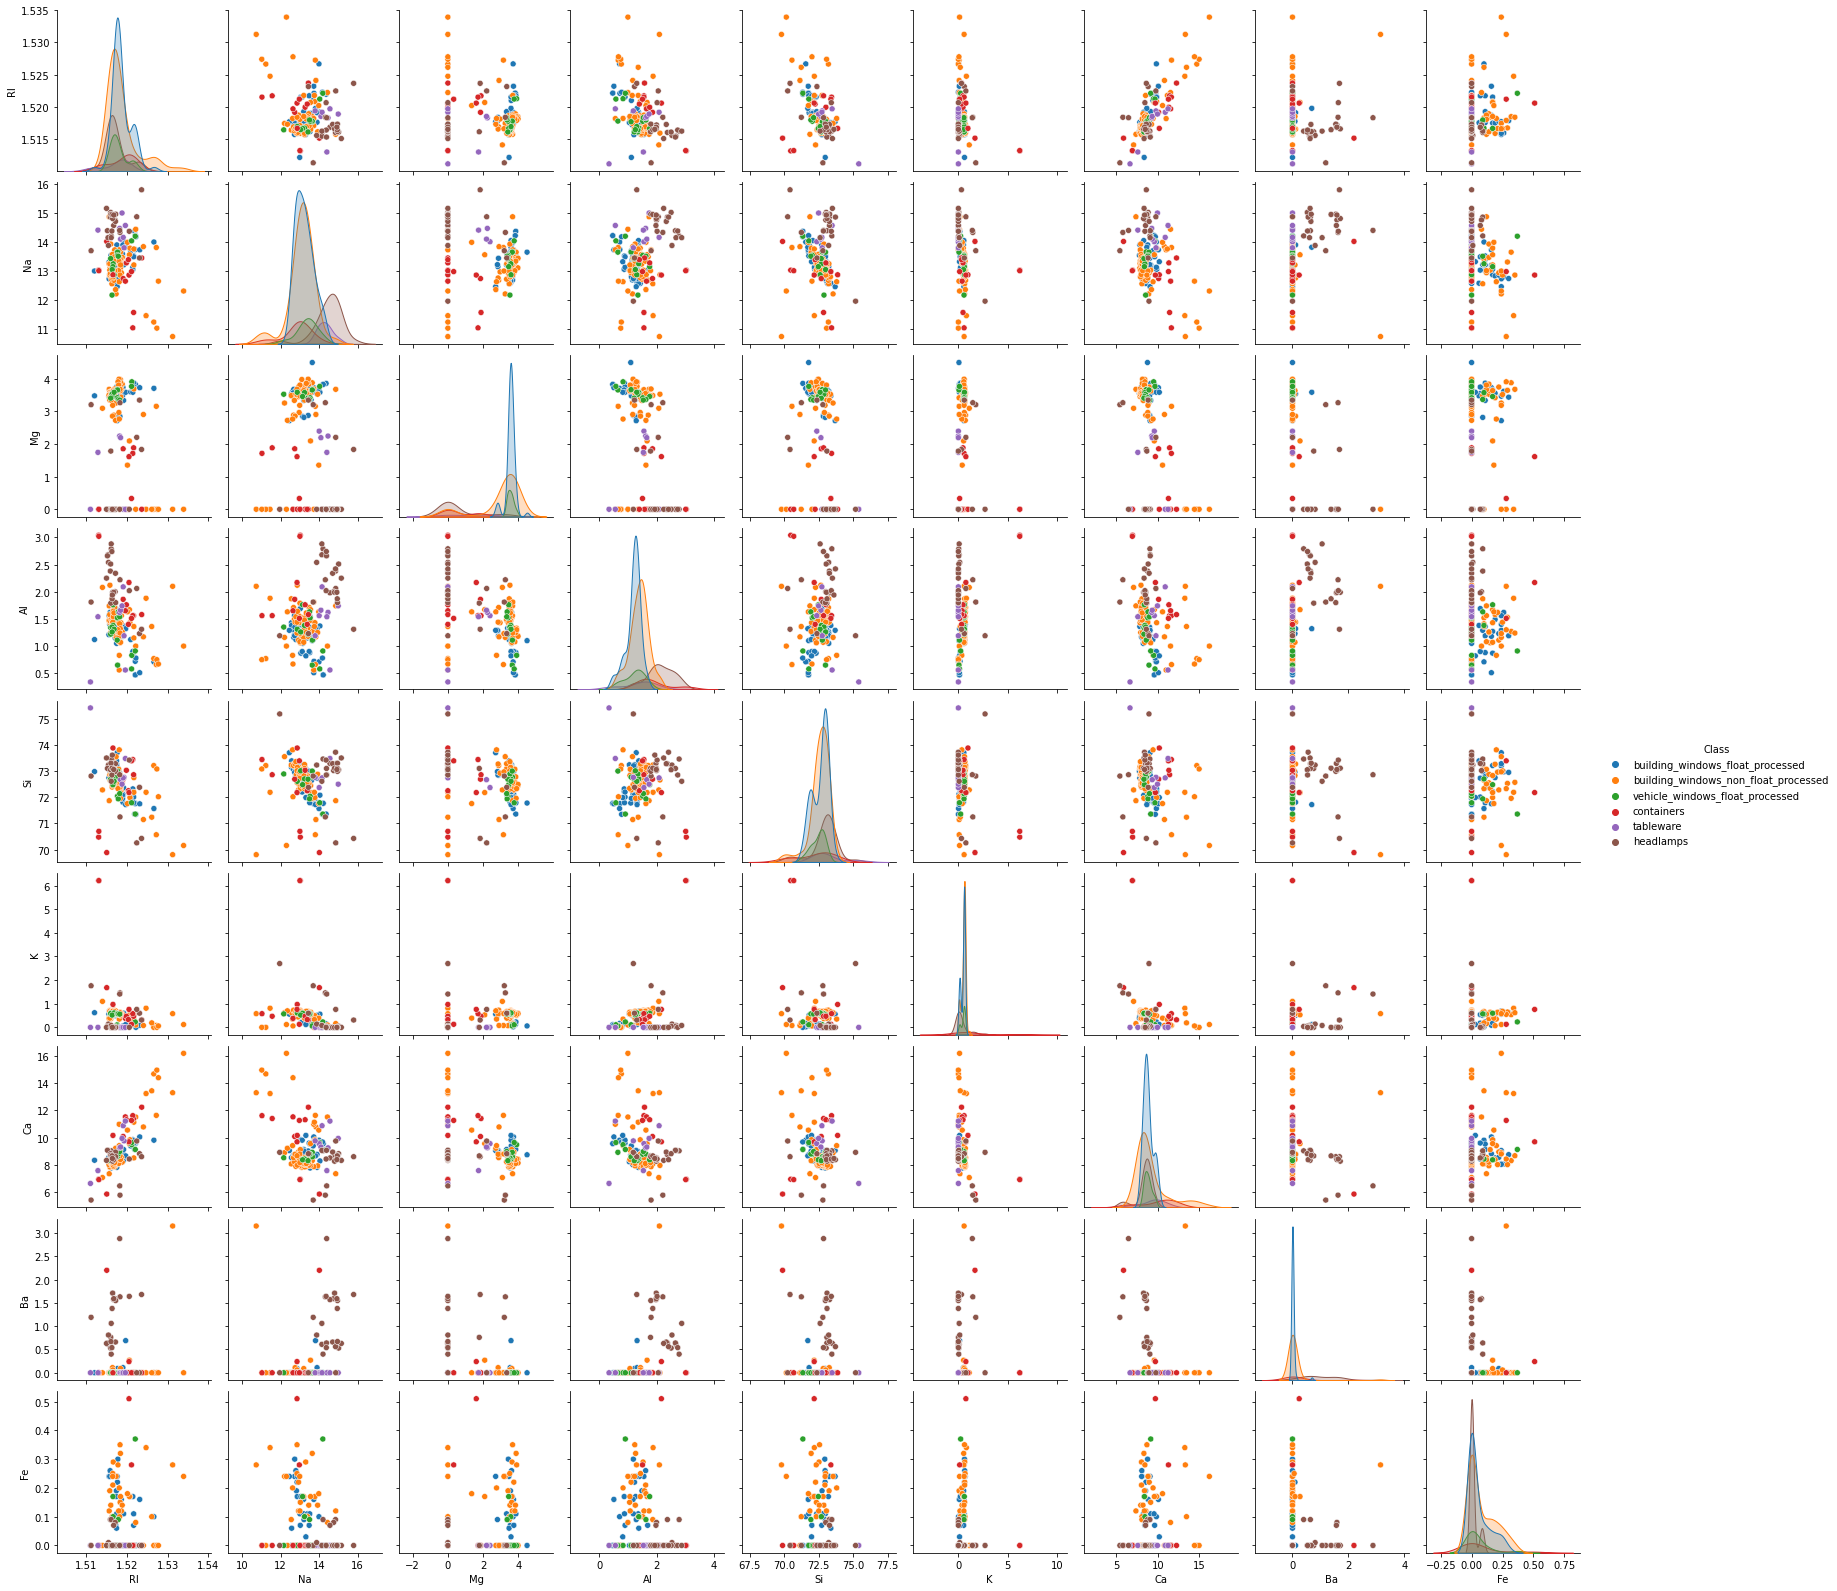

In [22]:
sns.pairplot(data = data, hue='Class')
plt.show()

# NaN

In [23]:
# data.mean()
# data_fiiled_nan.info()

# data['Class'].value_counts().index.values[0]
# data['Class'].mode()

In [24]:
data_fiiled_nan = data.fillna(data.mean(), ).copy()
data_fiiled_nan['Class'].fillna(data['Class'].value_counts().index.values[0], inplace=True)

In [25]:
data_fillna_mean = data.fillna(data.mean()).copy()
data['Class'].value_counts().index.values[0]
data['Class'].mode()
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0], inplace = True)

# PCA

In [26]:
pca = PCA( )
pca.fit(data_fiiled_nan[data_fiiled_nan.columns[data_fiiled_nan.columns.values != 'Class']])

pca.explained_variance_ratio_*100

array([4.70900947e+01, 2.57556406e+01, 1.13484102e+01, 9.86063489e+00,
       2.99140787e+00, 1.99212182e+00, 8.24849095e-01, 1.36816395e-01,
       2.44089992e-05])

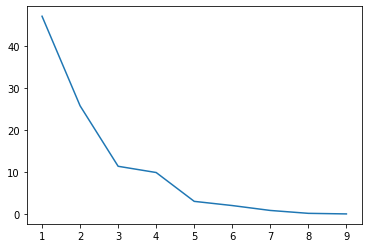

In [27]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 10) ,pca.explained_variance_ratio_*100)

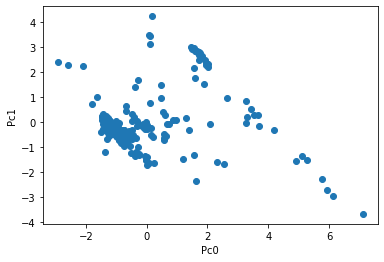

In [28]:
result = pca.transform(data_fiiled_nan[data_fiiled_nan.columns.values[data_fiiled_nan.columns.values != 'Class']])

pca_Names = []

for i in range(9):
  pca_Names.append('Pc' + str(i))

data_pca = pd.DataFrame(result,columns=pca_Names) 
fig, ax = plt.subplots()

ax.scatter(data_pca['Pc0'], data_pca['Pc1'])
ax.set_xlabel('Pc0')
ax.set_ylabel('Pc1')

plt.show()

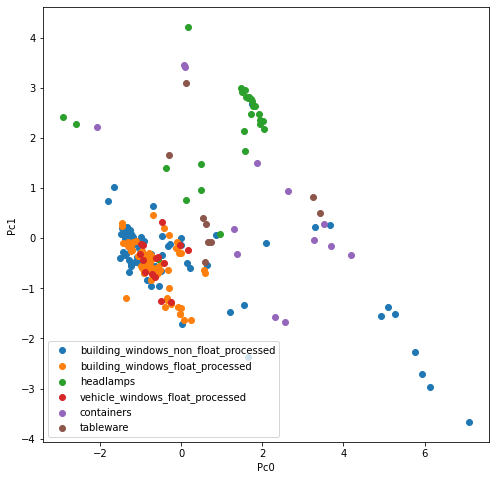

In [29]:
data_pca['Class'] = data_fillna_mean['Class'].copy()

col1 = 'Pc0'
col2 = 'Pc1'

fig, ax = plt.subplots(figsize=(8, 8))

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             label = glassType)
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.legend()


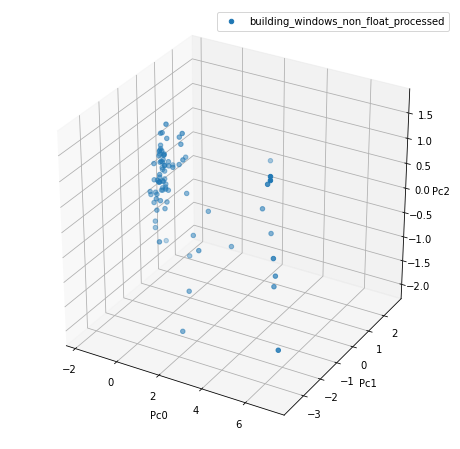

In [30]:
col1 = 'Pc0'
col2 = 'Pc1'
col3 = 'Pc2'

# fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             data_pca[col3][data_pca['Class'] == glassType],
             label = glassType)
  
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.set_zlabel(col3)

  ax.legend()

  plt.show()

  # plotly

  '''
  заполнить пробелы средним/модой по ктегориям 
  '''

# Корреляция (heatmap)

In [31]:
corr = data_fillna_mean.corr() 
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.154342,-0.162583,-0.368807,-0.507287,-0.273009,0.815863,0.018130,0.168658
Na,-0.154342,1.000000,-0.209475,0.206366,-0.169469,-0.256448,-0.275080,0.351450,-0.212992
Mg,-0.162583,-0.209475,1.000000,-0.427548,-0.111927,-0.007508,-0.414479,-0.433059,0.028596
Al,-0.368807,0.206366,-0.427548,1.000000,0.043668,0.295081,-0.237237,0.381742,-0.033498
Si,-0.507287,-0.169469,-0.111927,0.043668,1.000000,-0.189467,-0.224900,-0.128995,-0.099403
K,-0.273009,-0.256448,-0.007508,0.295081,-0.189467,1.000000,-0.313191,-0.034909,-0.004406
Ca,0.815863,-0.275080,-0.414479,-0.237237,-0.224900,-0.313191,1.000000,-0.121450,0.142708
Ba,0.018130,0.351450,-0.433059,0.381742,-0.128995,-0.034909,-0.121450,1.000000,-0.048402
Fe,0.168658,-0.212992,0.028596,-0.033498,-0.099403,-0.004406,0.142708,-0.048402,1.000000


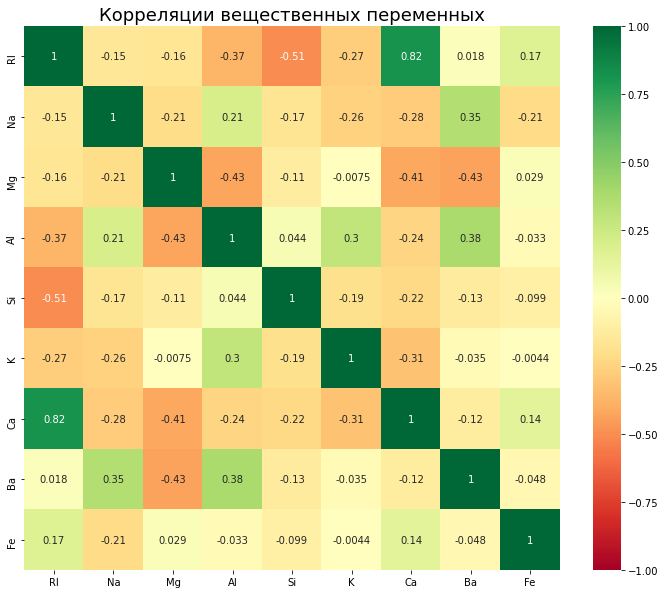

In [32]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, vmax=1, vmin = -1, cmap='RdYlGn', )
ax.set_title('Корреляции вещественных переменных', fontsize = 18)

plt.show()

Сильные корреляции (-1; -0,75), (0,75; 1)

Средние корреляции (-0,75; -0,45), (0,45; 0,75)

Слабые корреляции (-0,45; -0,25), (0,25; 0,45)

##Сильная корреляция

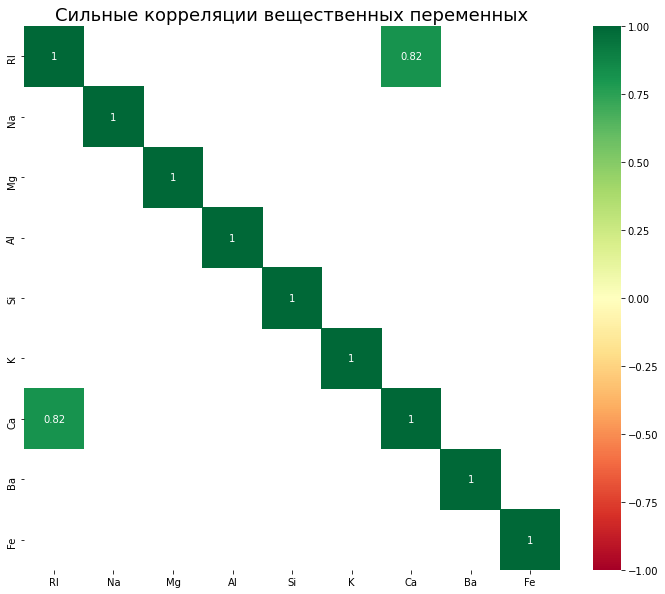

In [33]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], annot=True, vmax=1, vmin = -1, cmap='RdYlGn')
ax.set_title('Сильные корреляции вещественных переменных', fontsize = 18)

plt.show()

##Средние корреляции

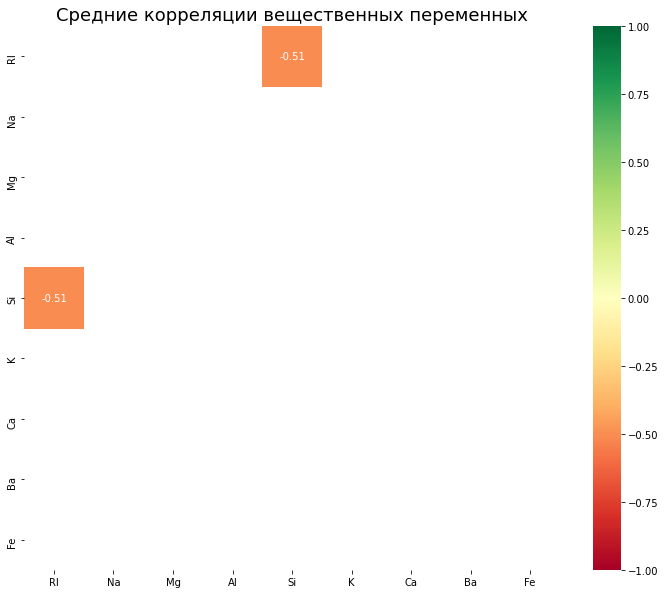

In [34]:
# corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)]

plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Средние корреляции вещественных переменных', fontsize = 18)

plt.show()

## Слабые корреляции

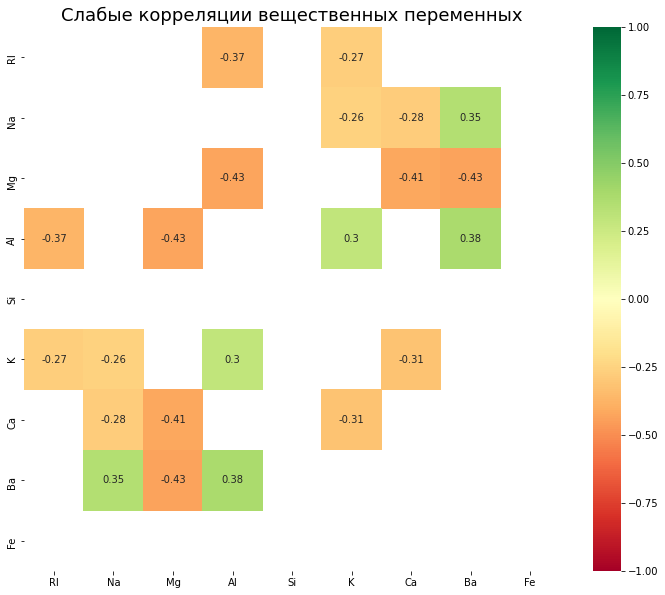

In [35]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.25 < corr[corr < 0.45]) | (corr[corr > -0.45] < -0.25)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Слабые корреляции вещественных переменных', fontsize = 18)

plt.show()

# Feature importance






In [36]:
forest = ExtraTreesClassifier(n_estimators=100)
forest.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']], data_fillna_mean['Class'])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [37]:
# forest.feature_importances_
np.sort(forest.feature_importances_)[::-1]

array([0.15646124, 0.14441894, 0.12617547, 0.12150543, 0.10715975,
       0.10275874, 0.09921658, 0.07681804, 0.06548582])

In [38]:
indices = np.argsort(forest.feature_importances_)[::-1]

print('Feature ranking:')
for f in range(9):
  print('%d. features %s (%f)' % (f + 1, data_fillna_mean.columns.values[indices[f]],forest.feature_importances_[indices[f]]))

Feature ranking:
1. features Mg (0.156461)
2. features Al (0.144419)
3. features RI (0.126175)
4. features Ca (0.121505)
5. features Na (0.107160)
6. features K (0.102759)
7. features Si (0.099217)
8. features Ba (0.076818)
9. features Fe (0.065486)


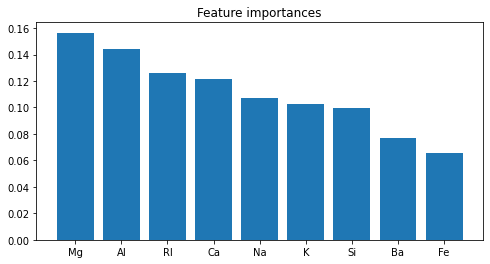

In [39]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.set_title('Feature importances')
ax.bar(data_fillna_mean.columns.values[indices],
       forest.feature_importances_[indices])
plt.show()

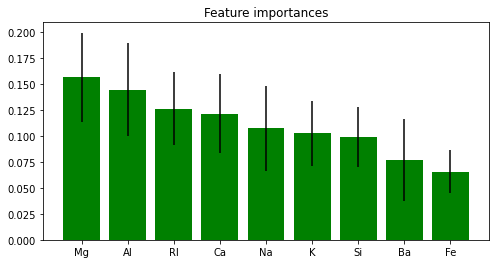

In [40]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis = 0)

fig, ax = plt.subplots(figsize = (8, 4))

ax.set_title('Feature importances')
ax.bar(data_fillna_mean.columns.values[indices],
       forest.feature_importances_[indices],
       color='g', yerr=std[indices], align='center')
plt.show()

# Homework

## 1. Cделать виджет для выбора переменной. Для выбранной переменной строиться гистограмма, если переменная числовая или столбчатая диаграмма, если переменная категориальная.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

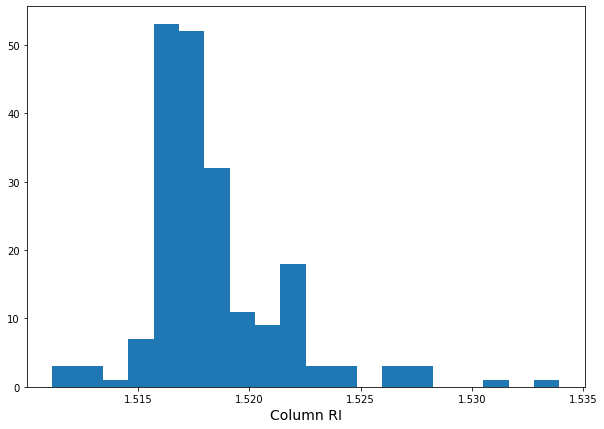

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

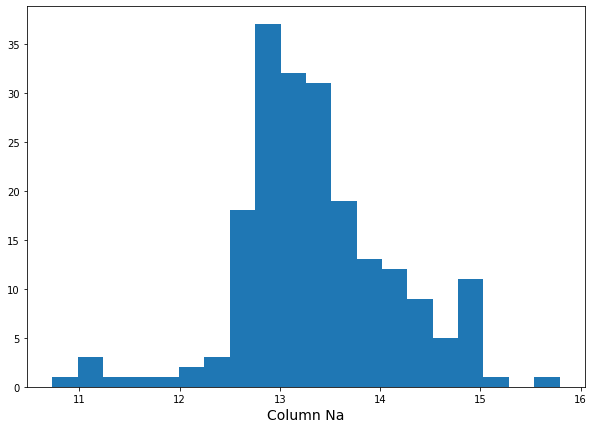

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

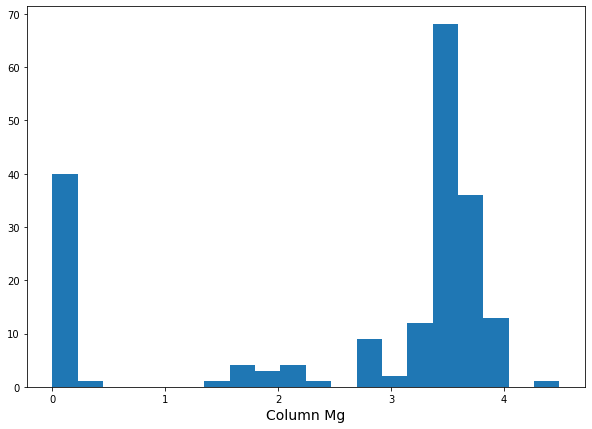

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

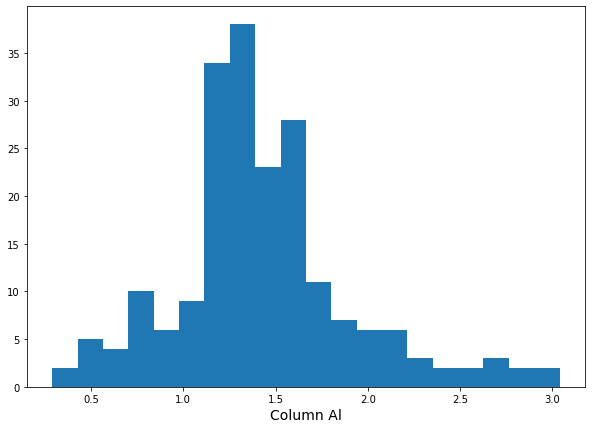

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

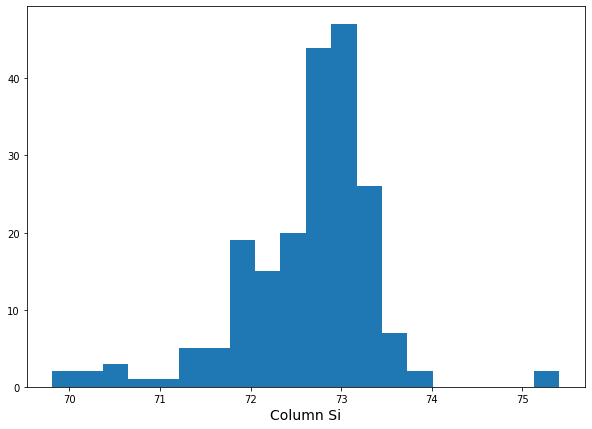

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

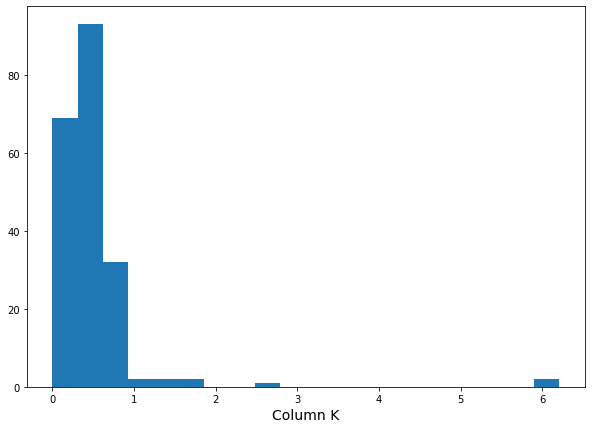

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

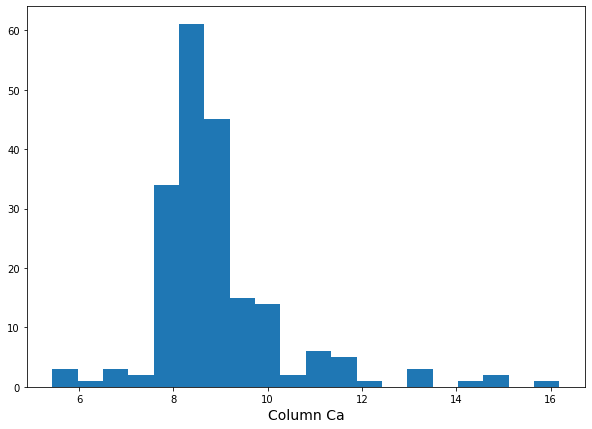

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

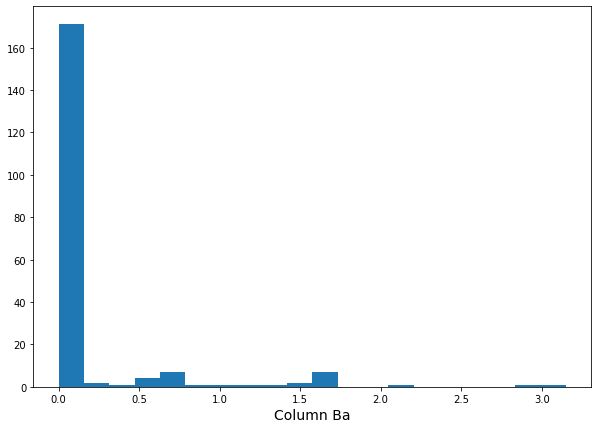

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

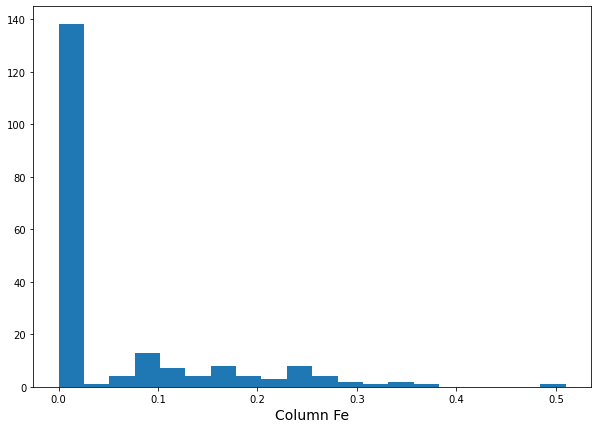

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

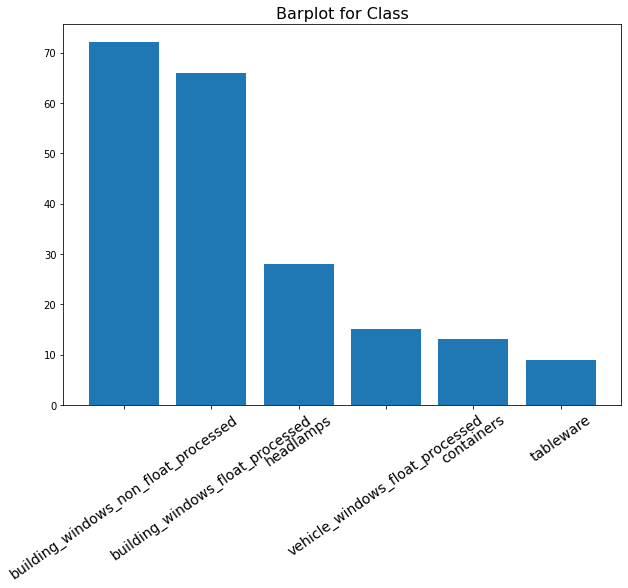

<IPython.core.display.Javascript object>

In [41]:
#@title
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']

tb = widgets.TabBar(columns, location='top')

def create_tub(ColName):
  with tb.output_to(str(ColName)):
    fig2, ax2 = plt.subplots(figsize=(10,7))
    if  ColName != 'Class':
      ax2.hist(data[ColName], bins=20)
      ax2.set_xlabel('Column ' + str(ColName), fontsize = 14)
    else:
      ax2.bar(data[ColName].value_counts().index.values, data[ColName].value_counts().values)
      ax2.set_xlabel(None, fontsize = 16 )
      ax2.set_title('Barplot for '+str(ColName), fontsize=16)
      ax2.tick_params(axis='x', which='major', labelsize=14, rotation=35)

    
for n in columns:
  create_tub(n)

## 2.   Cделать виджет для выбора переменной. Для выбранной переменной строиться диаграмма "ящик с усами".

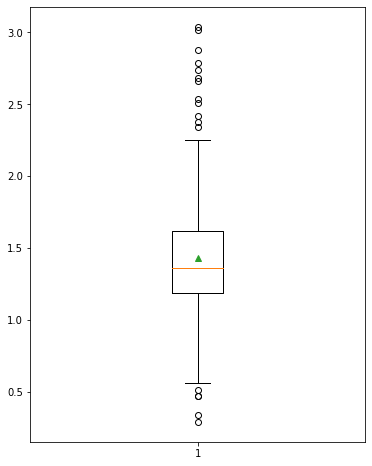

In [42]:
#@title {run: "auto"}
Column_Name = "Al" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"] 

fig3, ax3 = plt.subplots(figsize = (6, 8))

ax3.boxplot(data[str(Column_Name)][~np.isnan(data[str(Column_Name)])], showmeans=True)

plt.show()


## 3. Сделать виджет для выбора пары переменных, для них строится парный график с раскраской точек по классам.

In [43]:
#@title {run: "auto"}
Variable1 = "Si" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
Variable2 = "Ca" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

pairButton = widg.Button(description="Show Pair Plot")
pairOutput = widg.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with pairOutput:
    fig, ax = plt.subplots(figsize = (10, 8))

    for glassType in data['Class'].value_counts().index.values:
      ax.scatter(data[Variable1][data['Class'] == glassType],
                data[Variable2][data['Class'] == glassType],
                label = glassType)

    # ax.scatter(data['Mg'], data['Fe'])
    ax.set_xlabel(Variable1)
    ax.set_ylabel(Variable2)
    ax.legend()

    plt.show()

pairButton.on_click(on_button_clicked)
display(pairButton, pairOutput)


Button(description='Show Pair Plot', style=ButtonStyle())

Output()